In [1]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019立委_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

In [2]:
lin = fb[fb.page_name == "林岱樺"]

# 依照按讚數 低到高排序
lin = lin.sort_values(by=['like_count'])
# 用新的排序當作順序
lin.reset_index(inplace=True)

# 把時間格式轉換
lin['new_date'] = pd.to_datetime(lin['created_time_taipei']).dt.date
lin['post_hour'] = pd.to_datetime(lin['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
lin['month_year'] = pd.to_datetime(lin['new_date']).dt.to_period('M')

lin.head(1)

,index,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
0,12961,139678436043353_2315296331814875,139678436043353,林岱樺,政治人物,14日20時48分林園區北汕路26號發生火警，\n\n岱樺接獲反應後，馬上向有關單位查證獲報如下：\n現場係因中油林園廠新三輕工廠內電力系統故障跳機，並將管道內(乙烯)碳氫化合物排至燃燒塔燃燒，屬於中油製程流程，現場無危害之虞，無人受困受傷。\n\n有最新狀況將持續於粉絲頁上更新\n\n--\n\n(結報) 林園工業區服務中心災情通報：\n1.災情描述：108年1月14日20時51分於林園工業區台灣中油公司石化事業部新三輕泵浦因停電導致系統異常，立即啟動安全機置，導致北區燃燒塔排放大火，謝區長水福、王耀裕議員、林岱樺立委助理、邱于軒議員、五福、溪州里等約9位里長及民眾約50位到場關切，無媒體及人員傷亡。\n\n2.搶救情形：監測中心人員已至中油大門口鄰近處進行採樣作業，林園消防車3台、救護車1台、消防人員11人到場戒、警力約9人支援，環保局人員至門口進行環境監測，22時20分台灣中油公司陳副執行長國棟至現場說明，23時11分消防隊人員、環保局及警力全部撤離、民代及民眾已離去。\n\n3.後續處置：請監測中心人員持續加強監控周遭空氣品質數據及風向變化，本中心同仁進行工安通報、juiker通報南區處事件後續相關發展，將於相關教育訓練，向區內廠商宣導防災及預防。\n\n4.新聞作業：持續關注災情發展，適時對外說明。\n\n#安全第一\n#持續追蹤,NaN,video,https://www.facebook.com/139678436043353/posts/2315296331814875/,2019-01-15T04:07:27+0000,...,0,0,0,0,0,1,3,2019-01-15,12,2019-01


In [3]:
doc_names = range(len(lin)) #有幾篇文章 : 362 篇文章
doc_names

range(0, 362)

結巴斷詞 jieba

len(liu): 看劉櫂豪的貼文總共有幾筆
list(liu['message']): 把要斷詞的內容轉成 list 格式
創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [4]:
import numpy as np
lin = lin.replace(np.nan, '', regex=True) #將nan取代成空白字串

text_list = list(lin['message'])
# 把所有message轉成一個list 用for iterate

In [5]:
words = jieba.lcut(text_list[1], cut_all = False)
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\yangs\AppData\Local\Temp\jieba.cache
Loading model cost 0.616 seconds.
Prefix dict has been built successfully.


['【', '林園', '洋蔥節', '倒數', '2', '天', '】', '\n', '\n', '各位', '鄉親', '朋友', '們', '，', '林園', '洋蔥節', '倒數', '2', '️', '⃣', '天', '啦', '～', '\n', '\n', '還沒規劃', '好', '週日', '要', '去', '哪裡', '的', '朋友', '，', '就', '跟', '岱', '樺', '一起', '來', '去', '林園', '走走', '逛逛', '吧', '🐾', '🐾', '🐾', '\n', '\n', '日期', '：', '2', '/', '24', '(', '日', ')', '\n', '地點', '：', '林園', '王公', '廣應廟', '前廣場', '\n', '\n', '從', '早上', '9', '點開始', '就', '有', '闖關', '遊戲', '等', '活動開', '跑', '囉', '，', '歡迎', '大家', '一起', '到', '林園', '七', '逃', '🎪', '\n', '\n', '林園', '洋蔥節', '\n', '\n', '＃', '好', '地方', '岱', '你', '去', '\n', '＃', '林園', '\n', '＃', '林園', '洋蔥節', '\n', '\n', 'http', ':', '/', '/', 'bit', '.', 'ly', '/', '林園', '洋蔥節', 'GoGoGo']


In [7]:
words = jieba.lcut(text_list[361], cut_all = False)
print(words)

['各位', '鄉親', '好', '朋友', '，', '明天', '（', '1', '/', '9', ' ', ' ', '四', '）', '賴清德', '前院', '長將', '陪同', '岱', '樺', '一起', '掃街', '衝刺', '，', '向', '大家', '來', '請', '安拉', '票', '，', '歡迎', '鄉親', '朋友', '來', '幫', '我們', '加油', '打氣', '哦', '！', '\n', '\n', '*', '時間', '：', '\n', '1', '/', '9', '（', '四', '）', '下午', '2', ':', '30', '\n', '\n', '*', '路線', '：', '\n', '中', '保亭', '（', '參香', '）', '→', '大', '寮', '服務處', '→', '右轉', ' ', '會社', '(', '農會', ')', '→', '左轉', ' ', '鳳林', '三路', '→', '右轉', ' ', '中正路', '→', '直走', ' ', '中興里', '(', '萊爾富', ')', '→', '左轉', ' ', '前庄路', '→', '右轉', ' ', '八德', '路', '(', '朝中宮', ')', '→', '右轉', ' ', '鳳屏', '一路', '(', '江海', '豆漿', ')', '→', '右轉', ' ', '江山', '路', '→', ' ', '江山', '里長', '服務處', '（', '終點', '）', ' ', '\n', '\n', '#', '3', '號蔡', '英文', '賴清德', ' ', '#', '1', '號林', '岱', '樺', ' ', '#', '做', '對', '的', '選擇', ' ', '#', '讓', '民主', '與', '進步', '繼續']


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [9]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")
punctuation = " //，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

# creat a df to store the jieba result
lin_docs = pd.DataFrame(columns=['jieba_results']) # 建立df
lin_docs['jieba_results'] = lin_docs['jieba_results'].astype('str')

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text) # 把上面那些符號從text中刪掉
    text = re.sub(r'[0-9]','',text) # 刪掉數字
    text = re.sub(r'[a-zA-Z]','',text) #刪掉英文字
#刪除文字 更多標點符號
    text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗🎉⏰💪]','',text)  # 注意裡面不能有空白！
    s = pd.Series({'jieba_results': text})
    lin_docs = lin_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs

In [10]:
lin['jieba_results'] = lin_docs
lin_post = lin[['new_date','message','jieba_results','like_count']]
lin_post

,new_date,message,jieba_results,like_count
0,2019-01-15,14日20時48分林園區北汕路26號發生火警，\n\n岱樺接獲反應後，馬上向有關單位查證獲報如下：\n現場係因中油林園廠新三輕工廠內電力系統故障跳機，並將管道內(乙烯)碳氫化合物排至燃燒塔燃燒，屬於中油製程流程，現場無危害之虞，無人受困受傷。\n\n有最新狀況將持續於粉絲頁上更新\n\n--\n\n(結報) 林園工業區服務中心災情通報：\n1.災情描述：108年1月14日20時51分於林園工業區台灣中油公司石化事業部新三輕泵浦因停電導致系統異常，立即啟動安全機置，導致北區燃燒塔排放大火，謝區長水福、王耀裕議員、林岱樺立委助理、邱于軒議員、五福、溪州里等約9位里長及民眾約50位到場關切，無媒體及人員傷亡。\n\n2.搶救情形：監測中心人員已至中油大門口鄰近處進行採樣作業，林園消防車3台、救護車1台、消防人員11人到場戒、警力約9人支援，環保局人員至門口進行環境監測，22時20分台灣中油公司陳副執行長國棟至現場說明，23時11分消防隊人員、環保局及警力全部撤離、民代及民眾已離去。\n\n3.後續處置：請監測中心人員持續加強監控周遭空氣品質數據及風向變化，本中心同仁進行工安通報、juiker通報南區處事件後續相關發展，將於相關教育訓練，向區內廠商宣導防災及預防。\n\n4.新聞作業：持續關注災情發展，適時對外說明。\n\n#安全第一\n#持續追蹤,日 時 分林園 區北 汕路 號發生 火警 岱樺 接獲 反應 後 馬 上 向 有關 單位 查證 獲報 如下 現場 係 因 中油 林園 廠 新三輕 工廠 內電 力系 統 故障 跳機 並將 管道 內 乙烯 碳氫 化合物 排至 燃燒 塔 燃燒 屬 於 中油 製 程 流程 現場 無 危害 之虞 無人 受困 受傷 有 最新 狀況將 持續 於 粉絲頁 上 更新 結報 林園 工業區 服務 中心 災情 通報 災情 描述 年 月 日 時 分 於 林園 工業區 台灣 中 油公司 石化 事業部 新三輕泵浦 因停 電導致 系統 異常 立即 啟動 安全 機置 導致 北區 燃燒 塔 排放 大火 謝區長 水福 王耀裕 議員 林岱樺 立委 助理 邱于 軒議員 五福 溪州 里 等 約 位里長 及民眾 約 位到場 關切 無媒體 及 人員 傷亡 搶救 情形 監測 中心 人員 已 至 中油 大門口 鄰近 處 進行 採樣 作業 林園 消防 車 台 救護車 台 消防人 員 人到 場戒 警力 約 人 支援 環保局 人員 至門口 進行 環境 監測 時 分 台灣 中 油公司 陳 副 執行長 國棟 至 現場 說明 時 分 消防 隊人員 環保局 及 警力 全部 撤離 民代 及民眾 已離 去 後 續 處置 請 監測 中心 人員 持續 加強 監控 周遭 空氣 品質 數據 及 風向 變化 本 中心 同仁 進行工 安通 報 通報 南區 處 事件 後 續 相關 發展 將於相關 教育 訓練 向區 內廠 商宣導 防災及 預防 新聞 作業 持續 關注 災情 發展 適時 對外 說明 安全 第一 持續 追 蹤,71
1,2019-02-22,【林園洋蔥節倒數2天】\n\n各位鄉親朋友們，林園洋蔥節倒數2️⃣天啦～\n\n還沒規劃好週日要去哪裡的朋友，就跟岱樺一起來去林園走走逛逛吧🐾🐾🐾\n\n日期：2/24(日)\n地點：林園王公廣應廟前廣場\n\n從早上9點開始就有闖關遊戲等活動開跑囉，歡迎大家一起到林園七逃🎪\n\n林園洋蔥節\n\n＃好地方岱你去\n＃林園\n＃林園洋蔥節\n\nhttp://bit.ly/林園洋蔥節GoGoGo,林園 洋蔥節 倒數 天 各位 鄉親 朋友 們 林園 洋蔥節 倒數 ️ ⃣ 天 啦 還沒規劃 好 週日 要 去 哪裡 的 朋友 就 跟 岱樺 一起 來 去 林園 走走 逛逛 吧 🐾 🐾 🐾 日期 日 地點 林園 王公 廣應廟 前廣場 從 早上 點 開始 就 有 闖關 遊戲 等 活動開 跑 囉 歡迎 大家 一起 到 林園 七 逃 🎪 林園 洋蔥節 好 地方 岱 你 去 林園 林園 洋蔥節 林園 洋蔥節,81
2,2019-01-22,陸橋2月開拆，究竟能拆多快呢？\n\n來往周邊的朋友要記得改道喔！,陸橋 月 開 拆 究竟 能 拆多快 呢 來往 周邊 的 朋友 要 記得 改道 喔,81
3,2019-01-14,14日20時48分林園區北汕路26號發生火警，\n\n岱樺接獲反應後，馬上向有關單位查證獲報如下：\n現場係因中油林園廠新三輕工廠內電力系統故障跳機，並將管道內(乙烯)碳氫化合物排至燃燒塔燃燒，屬於中油製程流程，現場無危害之虞，無人受困受傷。\n\n有最新狀況將持續於粉絲頁上更新\n\n--\n\n(結報) 林園工業區服務中心災情通報：\n1.災情描述：108年1月14日20時51分於林園工業區台灣中油公司石化事業部新三輕泵浦因停電導致系統異常，立即啟動安全機置，導致北區燃燒塔排放大火，謝區長水福、王耀裕議員、林岱樺立委助理、邱于軒議員、五福、溪州里等約9位里長及民眾約50位到場關切，無媒體及人員傷亡。\n\n2.搶救情形：監測中心人員已至中油大門口鄰近處進行採樣作業，林園消防車3台、救護車1台、消防人員11人到場戒、警力約9人支援，環保局人員至門口進行環境監測，22時20分台灣中油公司陳副執行長國棟至現場說明，23時11分消防隊人員、環保局及警力全部撤離、民代及民眾已離去。\n\n3.後續處置：請監測中心人員持續加強監控周遭空氣品質數據及風向變化，本中心同仁進行工安通報、juiker通報南區處事件後續相關發展，將於相關教育訓練，向區內廠商宣導防災及預防。\n\n4.新聞作業：持續關注災情發展，適時對外說明。\n\n---\n\n#安全第一\n#持續追蹤,日 時 分林園 區北 汕路 號發生 火警 岱樺 接獲 反應 後 馬 上 向 有關 單位 查證 獲報 如下 現場 係 因 中油 林園 廠 新三輕 工廠 內電 力系 統 故障 跳機 並將 管道 內 乙烯 碳氫 化合物 排至 燃燒 塔 燃燒 屬 於 中油 製 程 流程 現場 無 危害 之虞 無人 受困 受傷 有 最新 狀況將 持續 於 粉絲頁 上 更新 結報 林園 工業區 服務 中心 災情 通報 災情 描述 年 月 日 時 分 於 林園 工業區 台灣 中 油公司 石化 事業部 新三輕泵浦 因停 電導致 系統 異常 立即 啟動 安全 機置 導致 北區 燃燒 塔 排放 大火 謝區長 水福 王耀裕 議員 林岱樺 立委 助理 邱于 軒議員 五福 溪州 里 等 約 位里長 及民眾 約 位到場 關切 無媒體 及 人員 傷亡 搶救 情形 監測 中心 人員 已 至 中油 大門口 鄰近 處 進行 採樣 作業 林園 消防 車 台 救護車 台 消防人 員 人到 場戒 警力 約 人 支援 環保局 人員 至門口 進行 環境 監測 時 分 台灣 中 油公司 陳 副 執行長 國棟 至 現場 說明 時 分 消防 隊人員 環保局 及 警力 全部 撤離 民代 及民眾 已離 去 後 續 處置 請 監測 中心 人員 持續 加強 監控 周遭 空氣 品質 數據 及 風向 變化 本 中心 同仁 進行工 安通 報 通報 南區 處 事件 後 續 相關 發展 將於相關 教育 訓練 向區 內廠 商宣導 防災及 預防 新聞 作業 持續 關注 災情 發展 適時 對外 說明 安全 第一 持續 追 蹤,83
4,2019-01-21,【108年春節高速公路疏運措施】\n\n春節快到了，在外地讀書、打拼的高雄人回家的時刻也到了。\n今年，一起回家過年吧。\n\n＃歡迎回家\n＃過年回家團圓\n＃安全駕駛平安回家,年春節 高速公路 疏運 措施 春節 快 到 了 在 外地 讀書 打拼 的 高雄人 回家 的 時刻 也 到 了 今年 一起 回家 過年 吧 歡迎 回家 過年 回家 團圓 安全 駕駛 平安 回家,84
...,...,...,...,...
357,2019-12-28,謝謝今天 潘孟安縣長特別來到林園陪同岱樺掃街拜票，也很謝謝鄉親朋友的支持和鼓勵。\n\n我們高雄是個熱情而有活力的城市，在接下來的日子裡，岱樺拜託大家一起加油，一定要票票入匭，總統票請投3號蔡英文、立委票請投給1號林岱樺，大家用行動來讓台灣更好，高雄更進步！\n\n#林園 # 潘孟安 #票票入匭 #1起讓高雄更好,謝謝 今天 潘孟安縣 長 特別 來 到 林園 陪同 岱樺 掃街 拜票 也 很 謝謝 鄉親 朋友 的 支持 和 鼓勵 我們 高雄 是 個 熱情 而 有 活力 的 城市 在 接下 來 的 日子 裡 岱樺 拜 託 大家 一起 加油 一定 要票 票入 匭 總統票 請 投 號 蔡英文 立委 票 請 投給 號 林岱樺 大家 用行動 來 讓 台灣 更好 高雄 更 進步 林園 潘孟安 票票 入 匭 起 讓 高雄 更好,1902
358,2019-07-15,今天7/15(一)，高雄的太陽依舊炙熱，空氣還是那股熟悉的味道，但對岱樺來說，今天最大的不同是那雙從小溫暖岱樺的大手，摯愛的父親，離開了⋯\n\n接下來，岱樺將和家人依循傳統習俗直到父親的後事圓滿。追思期間岱樺停止選務活動，各地服務處仍正常對外服務，如有不周之處祈請各位鄉親見諒。也謝謝大家的關心，再次感謝⋯\n\n大寮服務處\n電話：(07)781 8117\n地址：高雄市大寮區力行路61號\n\n林園服務處\n電話：(07)642 1376\n地址：高雄市林園區林園南路92巷51弄8號\n\n仁武聯合服務處\n電話：(07)372 111

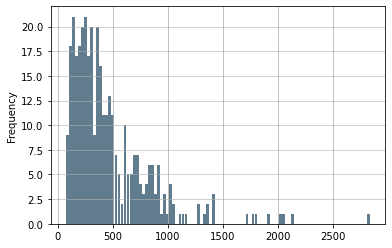

In [12]:
commutes = lin_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [17]:
temp = lin_post[(lin_post['like_count'] <= 2000) & (lin_post['like_count'] > 500)]
temp

,new_date,message,jieba_results,like_count
246,2019-05-01,今天是5月1日勞動節，各位勞工朋友大家辛苦了！\n岱樺在此祝福所有的勞工朋友們平安、健康、快樂！\n讓勞工朋友的勞動環境與勞動條件都能一年比一年好\n是岱樺作為國會議員努力的目標\n＃不遺餘力，＃也會更加努力！\n \n＃岱你監督 \n＃最打拼ㄟ立委\n＃岱地方拚發展,今天 是 月 日 勞動節 各位 勞工 朋友 大家 辛苦 了 岱樺 在 此 祝福 所有 的 勞工 朋友 們 平安 健康 快樂 讓 勞工 朋友 的 勞動 環境 與 勞動 條件 都 能 一年 比 一年 好 是 岱樺 作為 國會 議員 努力 的 目標 不 遺餘力 也 會 更加 努力 岱 你 監督 最 打拼 ㄟ 立委 岱 地方 拚 發展,501
247,2019-09-09,謝謝昨天來參加岱樺大寮區座談會的朋友們，藉著大家聚在一起的機會，岱樺除了向各位鄉親朋友報告一下岱樺這些年來的努力外，也向大家說明岱樺接下要在大寮區努力的工作和目標。\n\n岱樺希望在接下來的日子裡，除了請各位好朋友們繼續給予岱樺及服務團隊支持和鼓勵外，也請各位好友們和岱樺站在一起，共同守護臺灣的民主價值、共同打拚地方發展的好將來！\n\n地方座談下一站，我們林園見\n\n#臺灣價值 #高雄 #大寮 #座談會 #拚地方發展出頭天,謝謝 昨天 來 參加 岱樺 大 寮 區座 談會 的 朋友 們 藉 著 大家 聚在一起 的 機會 岱樺 除了 向 各位 鄉親 朋友 報告 一下 岱樺 這些 年 來 的 努力 外 也 向 大家 說明 岱樺 接下 要 在 大 寮 區 努力 的 工作 和 目標 岱樺 希望 在 接下 來 的 日子 裡 除了 請 各位 好 朋友 們 繼續 給予 岱樺 及 服務 團隊 支持 和 鼓勵 外 也 請 各位 好友 們 和 岱樺 站 在 一起 共同 守護 臺 灣的 民主 價值 共同 打 拚 地方 發展 的 好 將來 地方 座 談下 一站 我們 林園 見 臺 灣價值 高雄 大 寮 座 談會 拚 地方 發 展出 頭天,502
248,2019-06-13,#給畢業的你 \n\n孩子今日你將飛翔\n未來的道路上不必擔心害怕 \n咱的家是你最好的後盾\n\n#因為你們值得所以岱樺願意,給畢業 的 你 孩子 今日 你 將飛翔 未來 的 道路 上 不必 擔心 害怕 咱 的 家 是 你 最好 的 後 盾 因為 你 們 值得 所以 岱樺 願意,506
249,2019-08-13,「投資台灣、衝經濟」\n\n今天感謝經濟部沈榮津部長南下大發工業區與廠商及鄉親座談，岱樺也把握這個機會更深入瞭解業者的訴求，會中部長向大家聊起台商回台2.0行動方案、根留台灣企業投資方案、中小企業投資方案等投資台灣三大方案獎勵優惠措施。\n\n岱樺與在場與會者最關切的不外乎是人才培訓以及根留台灣等議題，沈榮津部長也一一回應廠商各項需求。\n\n#據統計兩工業區廠商預計加碼投資162億元\n#創造約1000個工作機會\n\n照片來源：大發工業區廠商協進會提供,投資 台灣 衝經濟 今天 感謝 經濟部 沈榮津 部長 南下 大發工業區 與 廠 商及 鄉親 座談 岱樺 也 把握 這個 機會 更 深入 瞭解業者 的 訴求 會 中部 長 向 大家 聊起 台商 回台 行動 方案 根留 台灣 企業 投資 方案 中小企業 投資 方案 等 投資 台灣 三大 方案 獎勵 優惠 措施 岱樺 與 在場 與 會者 最 關切 的 不外乎 是 人才 培訓 以及 根留 台灣 等 議題 沈榮津 部長 也 一 一回 應廠 商各項 需求 據 統計 兩 工業區 廠商 預計 加碼 投資 億元 創造 約 個 工作 機會 照片 來源 大發工業區 廠商協 進會 提供,507
250,2019-08-02,向鄉親報告 防洪作業持續進行中\n\n近日時有艷陽高照，但一過中午大雨不斷的情形，岱樺知道鄉親好友最關注的，莫過於是淹水問題，歷經去年瞬間強降雨各區淹水，不論在中央或地方，岱樺跟政府團隊皆多次會議商討，只盼能降低災害。\n\n今年初起，岱樺除勘查後勁溪排水系統、大寮區拷潭排水以及林園排水外，也到中央召開會議，並成功爭取中央經費的支持！\n\n現正進行中的是八涳橋清淤作業！\n\n#午後大雨請鄉親好友注意安全,向 鄉親 報告 防洪 作業 持續 進行 中 近日 時有艷陽 高照 但 一過 中午 大雨 不斷 的 情形 岱樺 知道 鄉親 好友 最關 注 的 莫過 於 是 淹水 問題 歷經 去年 瞬間強 降雨 各區 淹水 不論 在 中央 或 地方 岱樺 跟 政府 團隊 皆 多次 會議 商討 只 盼 能 降低 災害 今年初 起 岱樺 除 勘查 後 勁溪 排水 系統 大 寮 區拷潭 排水 以及 林園 排水 外 也 到 中央 召開會議 並 成功 爭取 中央 經費 的 支持 現正 進行 中 的 是 八 涳 橋 清淤 作業 午 後 大雨 請 鄉親 好友 注意安全,508
...,...,...,...,...
353,2020-01-09,針對國民黨中央黨部及高雄地方黨部在今日連開兩場記者會，指控岱樺於1/5(日)的造勢活動發放走路工一事，岱樺在林智鴻議員、江瑞鴻議員、鄭孟洳議員、黃秋媖議員及各界聲援志工等陪同下特別召開記者會加以譴責，且岱樺已委請律師於明日(1/10)進行提告。\n\n國民黨這種把1/9(四)早上發生之事實移花接木至1/5(日)造勢大會，並抹黑岱樺1/5(日)造勢活動發放走路工的行為，不僅是對岱樺和團隊人員的人格傷，更是對選民的愚弄及對民主法治的誣蔑。臺灣的民主法治得來不易，請大家珍惜。,針對 國民黨 中央 黨部 及 高雄 地方 黨部 在 今日 連開 兩場 記者 會 指控 岱樺 於 日 的 造勢 活動 發放 走路 工 一事 岱樺 在 林智鴻議員 江瑞鴻議員 鄭孟 洳 議員 黃 秋 媖 議員及 各界 聲援志工 等 陪同 下特別 召開 記者 會 加以 譴責 且 岱樺 已委請 律師 於 明日 進行 提告 國民黨 這種 把 四 早上 發生 之事實 移花接木 至 日 造勢 大會 並 抹黑 岱樺 日 造勢 活動 發放 走路 工的 行為 不僅 是 對 岱樺 和 團隊 人員 的 人格 傷 更是 對 選民 的 愚弄 及 對 民主 法治 的 誣蔑 臺 灣的 民主 法治 得來 不易 請 大家 珍惜,1421
354,2019-08-04,各位鄉親好友們大家晚安～\n\n今日，小編要來回答幾個流傳已久的坊間小疑問！\n\n常有人問，岱樺是不是很兇？\n沒錯！她很兇，非常兇！\n她兇官員不能體會基層民眾的煩惱！\n滿腔服務選民的積極與熱忱，若不能解決民眾的困境，她真的很兇！\n\n也有人問，岱樺是不是很難相處？\n沒錯！真的很難相處！\n時不時拿起抹布跟掃把幫同仁打掃辦公環境，常把我們搞得不知所措...\n遇到這樣的老闆真的是很無奈！\n\n更多人在問，岱樺到底有沒有結婚？\n她自己是說嫁給台灣跟高雄了！\n在同仁眼中的她，確實，365天無私的奉獻，都懷疑她是不是綠巨人浩克！\n\n相信我，如果要問起她的生日願望，除了家人平安健康，不外乎就是國泰民安、風調雨順吧XD\n\n回答到此！\n透過老闆的臉書，小編邀請大家一起對岱樺說\n🎉🎉生日快樂🎉🎉\n\n#不要問為什麼又是背影\n#因為老闆總是比小編更常在第一線...\n#舉辦活動也要親力親為的背影\n\n最後小編還是想跟岱樺說，辛苦了...我們一起拚！,各位 鄉親 好友 們 大家 晚安 今日 小 編要 來 回答 幾個 流傳 已久 的 坊 間 小疑問 常有 人問 岱樺 是不是 很 兇 沒錯 她 很 兇 非常 兇 她 兇 官員 不能 體會 基層民眾 的 煩惱 滿腔 服務 選民 的 積極 與 熱忱 若 不能 解決民眾 的 困境 她 真的 很 兇 也 有人 問 岱樺 是不是 很難 相處 沒錯 真的 很難 相處 時不時 拿 起 抹布 跟 掃 把 幫 同仁 打掃 辦公環境 常 把 我們 搞 得 不知所措 遇到 這樣 的 老 闆 真的 是 很 無奈 更多 人在問 岱樺 到底 有 沒 有 結婚 她 自己 是 說 嫁給 台灣 跟 高雄 了 在 同仁 眼中 的 她 確實 天無私 的 奉獻 都 懷疑 她 是不是 綠 巨人 浩克 相信 我 如果 要 問起 她 的 生日 願望 除了 家人 平安 健康 不外乎 就是 國泰 民安 風調 雨順 吧 回答 到 此 透過 老 闆 的 臉書 小編 邀請 大家 一起 對 岱樺 說 生日 快樂 不要 問為 什麼 又 是 背影 因為 老 闆 總 是 比小編 更常 在 第一 線 舉辦 活動 也 要 親力 親為 的 背影 最後小編 還是 想 跟 岱樺 說 辛苦 了 我們 一起 拚,1719
355,2019-12-31,離投票日只剩下十天，岱樺的文宣不曉得好朋友們還有沒有留著啊？岱樺想透過這支影片的發佈，提醒大家一件事，要讓地方更好，台灣更進步，必須要用行動來落實，而選舉期間所說過的每件事也都不只是口號，而是對大家的承諾，岱樺一定會認真看待，也會用心去努力！\n\n各位好朋友，這是岱樺此次參選的第二支影片，請大家多多指教，給岱樺支持加油、也幫忙多拉票、顧票、催票哦！,離 投票 日 只 剩下 十天 岱樺 的 文宣不曉得 好 朋友 們 還有 沒有 留著 啊 岱樺 想透 過這支 影片 的 發 佈 提醒 大家 一件 事 要 讓 地方 更好 台灣 更 進步 必須 要 用 行動來 落實 而 選舉 期間 所 說過 的 每件事 也 都 不 只是 口號 而是 對 大家 的 承諾 岱樺 一定 

In [18]:
corpus = temp['jieba_results'].values.tolist()

In [19]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
X = vectorizer.fit_transform(corpus) #  input must be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X) # X : corpus x word matrix, output:201 x 4835

In [20]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一一,一下,一事,一代,一代人,一件,一位,一個,一共,一切,...,點睛,點這邊,點點,黨內,黨部,鼎力,鼎盛,鼓勵,龍舟,龐大
0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.10322,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.123426,0.0,0.0
2,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.0,0.00000,0.118507,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.237013,0.0,0.0,0.000000,0.0,0.0
108,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
109,0.0,0.00000,0.000000,0.0,0.0,0.155172,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
110,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [21]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['邀請', '台灣', '今天', '還是', '投資', '農民', '照片', '岱樺', '農會', '紅豆']
TOP 10 WORDS PER TOPIC #1
['事件', '朋友', '大家', '民主', '各位', '香港', '繼續', '我們', '鄉親', '岱樺']
TOP 10 WORDS PER TOPIC #2
['一起', '仁武', '更好', '蔡英文', '小英總統', '大家', '立委', '林岱樺', '高雄', '岱樺']
TOP 10 WORDS PER TOPIC #3
['支持', '掃街', '活動', '一起', '今天', '林園', '大家', '我們', '鄉親', '岱樺']
TOP 10 WORDS PER TOPIC #4
['退休', '服務', '朋友', '努力', '大家', '爸爸', '感謝', '同仁', '繼續', '岱樺']
TOP 10 WORDS PER TOPIC #5
['更好', '問題', '今天', '支持', '各位', '努力', '工廠', '鄉親', '大家', '岱樺']
TOP 10 WORDS PER TOPIC #6
['高雄', '鄉親', '未來', '努力', '自己', '林園', '教育', '我們', '岱樺', '更好']
TOP 10 WORDS PER TOPIC #7
['爭取', '發展', '朋友', '大家', '林園', '鄉親', '地方', '我們', '更好', '岱樺']


In [22]:
LDA.fit(tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['總局', '注意安全', '做到', '問題', '好友', '大雨', '很多', '農業', '不會', '白費']
TOP 10 WORDS PER TOPIC #1
['美食', '料理', '農會', '站台', '團圓', '圓人', '通報', '中秋', '投給', '紅豆']
TOP 10 WORDS PER TOPIC #2
['繼續', '朋友', '進步', '林岱樺', '高雄', '我們', '一起', '大家', '更好', '岱樺']
TOP 10 WORDS PER TOPIC #3
['用行動', '地方', '交通', '更好', '發展', '爭取', '直播', '岱樺', '林園', '改善']
TOP 10 WORDS PER TOPIC #4
['情人', '報告', '滴滴', '愛的', '連線', '延伸', '毛豆', '共同', '岱樺', '紅豆']
TOP 10 WORDS PER TOPIC #5
['冷冷的', '鄉親', '節快', '大家', '垃圾', '香港', '岱樺', '記得', '天氣', '中秋']
TOP 10 WORDS PER TOPIC #6
['汕尾', '林右昌', '外出', '雷聲', '關於', '休息', '結束', '收心', '雨勢', '爸爸']
TOP 10 WORDS PER TOPIC #7
['文化', '鄉親', '葉慈', '孩子', '林園', '勞工', '冬至', '小編', '一天', '掃街']


In [23]:
#政見做斷詞

politics_lin = politics[politics.姓名 == "林 岱 樺"].政見.to_string()
#politics_kuan = politics[politics.姓名 == "吳思瑤"].政見.to_string()

politics_lin = re.sub(re_punctuation, "", politics_lin)
politics_lin = re.sub(r'[0-9]','',politics_lin)
politics_lin = re.sub(r'[a-zA-Z]','',politics_lin)
politics_lin = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗、，」「（）]','',politics_lin)  # 注意裡面不能有空白！
jieba.load_userdict("dict.txt")
politics_words = jieba.lcut(politics_lin, cut_all = False)

In [24]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_lin, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗+]','',text)
text = re.sub(re_punctuation, "", text)
text

' 林岱樺 長 年 在 國會 經濟 委員 會 重視 大 寮 林園 仁武 鳥松 經濟 發展 林岱樺 認為 只有 高雄 好 台灣 才 會 更好 不管 大小 地 方事 林岱樺 都 為 您 做到 最好 一 交通 讓 城鄉 沒有 距離 \u3000 \u3000 推動捷 運林園 延伸 線鳳松 輕軌 捷運線 \u3000 \u3000 推動區域 交通 平衡 發展 縮 小城 鄉 差距 促進 地區 繁榮 二 教育 贏在 起跑 點的 下一代 \u3000 \u3000 改善 教育 環境 提升 教學 設備 促進 區域 教學品 質及 平衡 教學 資源 分配 三 長 照 普及 平價 優質 的 長期 照護 系統 \u3000 \u3000 促進 政府 推動 各區 老人 日托 扶助 老人 社區 參 與 及 補助 計畫 以 因應 日 趨 嚴重 的 人口老化 問題 四 就業 人人 安薪樂業 的 生活 \u3000 \u3000 推動 廠商 優先 錄用 在 地 人才 促進 地方 就業機會 \u3000 \u3000 鼓勵 新 住民 參與並 融入 社區 活動 督促 政府 重視 族群 融合 成就 平等 就業機會 五 民生 打造 宜居城市 \u3000 \u3000 改善 各區 排水 系統務必 在 雨季 避免 再有 積水及 淹水 的 狀況 影響 居住 安全 與 品質 \u3000 \u3000 增進 社區 公園 開發 鼓勵 社區 營造 提升 居民 活動 空間 發展 優質 生活 環境 六 產業 在 地連結 打造 高雄 產業 聚落 \u3000 \u3000 一 仁大澄觀 新區 開發 \u3000 \u3000 二 重塑 高屏溪 山水 遊廊 \u3000 \u3000 三 改善 工業 生產設 備減 低污染 \u3000 \u3000 四 打造 鳳山 丘陵 南段 風景 特定 區 \u3000 \u3000 五 和 發 產業 園區 打造 為南 台灣 綠能 新興 產業 廊 帶 \u3000 \u3000 六 持續 完善 群眾募資法 增加 中小企業 募集 資金 管道'

In [25]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(politics_words)  
p_colword = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=8, random_state=None)

# 政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [p_vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)

TOP 10 WORDS PER TOPIC #0
['只有', '空間', '國會', '林園', '人人', '就業', '台灣', '政府', '生活', '改善']
TOP 10 WORDS PER TOPIC #1
['系統務必', '地區', '公園', '差距', '特定', '線鳳松', '安薪樂業', '設備', '推動', '老人']
TOP 10 WORDS PER TOPIC #2
['廠商', '普及', '為南', '嚴重', '增加', '綠能', '成就', '提升', '發展', '打造']
TOP 10 WORDS PER TOPIC #3
['仁大澄觀', '增進', '分配', '融入', '居民', '聚落', '地連結', '高屏溪', '沒有', '教學']
TOP 10 WORDS PER TOPIC #4
['不管', '起跑', '風景', '再有', '做到', '營造', '交通', '教育', '經濟', '林岱樺']
TOP 10 WORDS PER TOPIC #5
['園區', '因應', '教學品', '問題', '各區', '優質', '活動', '就業機會', '開發', '促進']
TOP 10 WORDS PER TOPIC #6
['方事', '淹水', '委員', '城鄉', '排水', '住民', '雨季', '繁榮', '平衡', '鼓勵']
TOP 10 WORDS PER TOPIC #7
['工業', '中小企業', '山水', '資金', '運林園', '高雄', '重視', '環境', '社區', '產業']


In [26]:
# #政見所有topic 總表
for i in topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ')

只有, 空間, 國會, 林園, 人人, 就業, 台灣, 政府, 生活, 改善, 系統務必, 地區, 公園, 差距, 特定, 線鳳松, 安薪樂業, 設備, 推動, 老人, 廠商, 普及, 為南, 嚴重, 增加, 綠能, 成就, 提升, 發展, 打造, 仁大澄觀, 增進, 分配, 融入, 居民, 聚落, 地連結, 高屏溪, 沒有, 教學, 不管, 起跑, 風景, 再有, 做到, 營造, 交通, 教育, 經濟, 林岱樺, 園區, 因應, 教學品, 問題, 各區, 優質, 活動, 就業機會, 開發, 促進, 方事, 淹水, 委員, 城鄉, 排水, 住民, 雨季, 繁榮, 平衡, 鼓勵, 工業, 中小企業, 山水, 資金, 運林園, 高雄, 重視, 環境, 社區, 產業, 

In [27]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數
#岱樺 大家 林園 

Counter({'只有': 1,
         '空間': 1,
         '國會': 1,
         '林園': 4,
         '人人': 1,
         '就業': 1,
         '台灣': 2,
         '政府': 1,
         '生活': 1,
         '改善': 1,
         '系統務必': 1,
         '地區': 1,
         '公園': 1,
         '差距': 1,
         '特定': 1,
         '線鳳松': 1,
         '安薪樂業': 1,
         '設備': 1,
         '推動': 1,
         '老人': 1,
         '廠商': 1,
         '普及': 1,
         '為南': 1,
         '嚴重': 1,
         '增加': 1,
         '綠能': 1,
         '成就': 1,
         '提升': 1,
         '發展': 2,
         '打造': 1,
         '仁大澄觀': 1,
         '增進': 1,
         '分配': 1,
         '融入': 1,
         '居民': 1,
         '聚落': 1,
         '地連結': 1,
         '高屏溪': 1,
         '沒有': 1,
         '教學': 1,
         '不管': 1,
         '起跑': 1,
         '風景': 1,
         '再有': 1,
         '做到': 1,
         '營造': 1,
         '交通': 1,
         '教育': 2,
         '經濟': 1,
         '林岱樺': 2,
         '園區': 1,
         '因應': 1,
         '教學品': 1,
         '問題': 2,
         '各區': 1,

In [28]:
top_10_message = tfidf_view.sort_values(by = ['岱樺'], ascending = False).index[:10] 
# 把台灣tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['岱樺'], ascending = False).head(10)

,一一,一下,一事,一代,一代人,一件,一位,一個,一共,一切,...,點睛,點這邊,點點,黨內,黨部,鼎力,鼎盛,鼓勵,龍舟,龐大
1,0.0,0.103220,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.123426,0.0,0.0
91,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
60,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.411916,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
109,0.0,0.000000,0.000000,0.0,0.0,0.155172,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
99,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
68,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.130504,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
20,0.0,0.067151,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
73,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
107,0.0,0.000000,0.118507,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.237013,0.0,0.0,0.000000,0.0,0.0
36,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [30]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[91,]).sort_values(by = 91, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,91
感謝,0.286012
岱樺,0.256007
有位,0.227649
原來,0.227649
文宣照,0.227649
...,...
寒流,0.000000
寄送,0.000000
容易,0.000000
家長,0.000000


In [31]:
#這些都是讚數很高的文章 每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

92       爸爸
93       走路
94       退休
95       號的
96       上善
97       小編
98       懇請
99     區萬丹路
100      汕尾
101      一定
102      一一
103     用行動
104     林岱樺
105      一一
106      一起
107      造勢
108     是不是
109      影片
110    一生一世
111      高雄
Name: term, dtype: object

In [33]:
#假如以剛剛科學園區相關主題為例 想看tfidf 最高的詞是兩岸關係的文章
message_newtfidf[message_newtfidf['term']=="林園"]

,一一,一下,一事,一代,一代人,一件,一位,一個,一共,一切,...,點這邊,點點,黨內,黨部,鼎力,鼎盛,鼓勵,龍舟,龐大,term
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,林園
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,林園
46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098182,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.098182,0.0,0.0,林園
66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,林園
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,林園


In [34]:
# 會發現文章出現tfidf是產業的很少，很正常 因為出現太多反而tfidf不會高！
temp.iloc[46,]

new_date                                                                                                                                                                                                                                                                                                                                                                   2019-11-30
message                                                  謝謝今天到場相挺的游錫堃前院長、管媽和莊瑞雄委員，也感謝所有今天來參加的鄉親朋友。因為有大家的鼓勵和支持，讓岱樺感到更溫暖、更有信心，大家要一起加油哦！\n\n岱樺還要謝謝今天來幫忙的志工鄉親，因為有你們的協助，活動才會更順利圓滿。對了，有志工夥伴在問岱樺邀請卡上的拍攝地點在哪？就在我們林園的蔣家宗祠，一個我們在地很棒的地方！\n\n《相關新聞》\n*立委林岱樺成立林園總部   游錫堃讚聲 鄉親力挺\nhttps://reurl.cc/alz4NZ\n\n*林岱樺林園總部成立 三千多位鄉親前來加油打氣 氣勢高昂\nhttps://reurl.cc/RdDyj9\n\n#2020我們一起贏 #林園 #游錫堃 #管碧玲 #莊瑞雄
jieba_results     謝謝 今天 到場 相挺 的 游錫堃 前 院長 管媽 和 莊瑞雄 委員 也 感謝 所有 今天 來 參加 的 鄉親 朋友  因為 有 大家 的 鼓勵 和 支持 讓 岱樺 感到 更溫 暖 更 有 信心 大家 要 一起 加油 哦 岱樺 還要 謝謝 今天 來 幫忙 的 志工 鄉親 因為 有 你 們 的 協助 活動 才 會 更 順利圓滿  對 了 有志 工夥伴 在問 岱樺 邀請 卡上 的 拍 攝 地點 在 哪 就 在 我們 林園 的 蔣家 宗祠 一個 我們 在 地 很棒 的 

In [35]:
words = jieba.lcut(text_list[1], cut_all = False)
print(words)

['【', '林園', '洋蔥節', '倒數', '2', '天', '】', '\n', '\n', '各位', '鄉親', '朋友', '們', '，', '林園', '洋蔥節', '倒數', '2', '️', '⃣', '天', '啦', '～', '\n', '\n', '還沒規劃', '好', '週日', '要', '去', '哪裡', '的', '朋友', '，', '就', '跟', '岱樺', '一起', '來', '去', '林園', '走走', '逛逛', '吧', '🐾', '🐾', '🐾', '\n', '\n', '日期', '：', '2', '/', '24', '(', '日', ')', '\n', '地點', '：', '林園', '王公', '廣應廟', '前廣場', '\n', '\n', '從', '早上', '9', '點', '開始', '就', '有', '闖關', '遊戲', '等', '活動開', '跑', '囉', '，', '歡迎', '大家', '一起', '到', '林園', '七', '逃', '🎪', '\n', '\n', '林園', '洋蔥節', '\n', '\n', '＃', '好', '地方', '岱', '你', '去', '\n', '＃', '林園', '\n', '＃', '林園', '洋蔥節', '\n', '\n', 'http', ':', '/', '/', 'bit', '.', 'ly', '/', '林園', '洋蔥節', 'GoGoGo']


In [36]:
# LDA : 看每篇文章被分配在哪些主題  (tfidf)
#review topic 結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['總局', '注意安全', '做到', '問題', '好友', '大雨', '很多', '農業', '不會', '白費']
TOP 10 WORDS PER TOPIC #1
['美食', '料理', '農會', '站台', '團圓', '圓人', '通報', '中秋', '投給', '紅豆']
TOP 10 WORDS PER TOPIC #2
['繼續', '朋友', '進步', '林岱樺', '高雄', '我們', '一起', '大家', '更好', '岱樺']
TOP 10 WORDS PER TOPIC #3
['用行動', '地方', '交通', '更好', '發展', '爭取', '直播', '岱樺', '林園', '改善']
TOP 10 WORDS PER TOPIC #4
['情人', '報告', '滴滴', '愛的', '連線', '延伸', '毛豆', '共同', '岱樺', '紅豆']
TOP 10 WORDS PER TOPIC #5
['冷冷的', '鄉親', '節快', '大家', '垃圾', '香港', '岱樺', '記得', '天氣', '中秋']
TOP 10 WORDS PER TOPIC #6
['汕尾', '林右昌', '外出', '雷聲', '關於', '休息', '結束', '收心', '雨勢', '爸爸']
TOP 10 WORDS PER TOPIC #7
['文化', '鄉親', '葉慈', '孩子', '林園', '勞工', '冬至', '小編', '一天', '掃街']


In [37]:
#可以猜猜看第一篇文是哪個topic 
temp.iloc[:,[0,2]]

,new_date,jieba_results
246,2019-05-01,今天 是 月 日 勞動節 各位 勞工 朋友 大家 辛苦 了 岱樺 在 此 祝福 所有 的 勞工 朋友 們 平安 健康 快樂 讓 勞工 朋友 的 勞動 環境 與 勞動 條件 都 能 一年 比 一年 好 是 岱樺 作為 國會 議員 努力 的 目標 不 遺餘力 也 會 更加 努力 岱 你 監督 最 打拼 ㄟ 立委 岱 地方 拚 發展
247,2019-09-09,謝謝 昨天 來 參加 岱樺 大 寮 區座 談會 的 朋友 們 藉 著 大家 聚在一起 的 機會 岱樺 除了 向 各位 鄉親 朋友 報告 一下 岱樺 這些 年 來 的 努力 外 也 向 大家 說明 岱樺 接下 要 在 大 寮 區 努力 的 工作 和 目標 岱樺 希望 在 接下 來 的 日子 裡 除了 請 各位 好 朋友 們 繼續 給予 岱樺 及 服務 團隊 支持 和 鼓勵 外 也 請 各位 好友 們 和 岱樺 站 在 一起 共同 守護 臺 灣的 民主 價值 共同 打 拚 地方 發展 的 好 將來 地方 座 談下 一站 我們 林園 見 臺 灣價值 高雄 大 寮 座 談會 拚 地方 發 展出 頭天
248,2019-06-13,給畢業 的 你 孩子 今日 你 將飛翔 未來 的 道路 上 不必 擔心 害怕 咱 的 家 是 你 最好 的 後 盾 因為 你 們 值得 所以 岱樺 願意
249,2019-08-13,投資 台灣 衝經濟 今天 感謝 經濟部 沈榮津 部長 南下 大發工業區 與 廠 商及 鄉親 座談 岱樺 也 把握 這個 機會 更 深入 瞭解業者 的 訴求 會 中部 長 向 大家 聊起 台商 回台 行動 方案 根留 台灣 企業 投資 方案 中小企業 投資 方案 等 投資 台灣 三大 方案 獎勵 優惠 措施 岱樺 與 在場 與 會者 最 關切 的 不外乎 是 人才 培訓 以及 根留 台灣 等 議題 沈榮津 部長 也 一 一回 應廠 商各項 需求 據 統計 兩 工業區 廠商 預計 加碼 投資 億元 創造 約 個 工作 機會 照片 來源 大發工業區 廠商協 進會 提供
250,2019-08-02,向 鄉親 報告 防洪 作業 持續 進行 中 近日 時有艷陽 高照 但 一過 中午 大雨 不斷 的 情形 岱樺 知道 鄉親 好友 最關 注 的 莫過 於 是 淹水 問題 歷經 去年 瞬間強 降雨 各區 淹水 不論 在 中央 或 地方 岱樺 跟 政府 團隊 皆 多次 會議 商討 只 盼 能 降低 災害 今年初 起 岱樺 除 勘查 後 勁溪 排水 系統 大 寮 區拷潭 排水 以及 林園 排水 外 也 到 中央 召開會議 並 成功 爭取 中央 經費 的 支持 現正 進行 中 的 是 八 涳 橋 清淤 作業 午 後 大雨 請 鄉親 好友 注意安全
...,...,...
353,2020-01-09,針對 國民黨 中央 黨部 及 高雄 地方 黨部 在 今日 連開 兩場 記者 會 指控 岱樺 於 日 的 造勢 活動 發放 走路 工 一事 岱樺 在 林智鴻議員 江瑞鴻議員 鄭孟 洳 議員 黃 秋 媖 議員及 各界 聲援志工 等 陪同 下特別 召開 記者 會 加以 譴責 且 岱樺 已委請 律師 於 明日 進行 提告 國民黨 這種 把 四 早上 發生 之事實 移花接木 至 日 造勢 大會 並 抹黑 岱樺 日 造勢 活動 發放 走路 工的 行為 不僅 是 對 岱樺 和 團隊 人員 的 人格 傷 更是 對 選民 的 愚弄 及 對 民主 法治 的 誣蔑 臺 灣的 民主 法治 得來 不易 請 大家 珍惜
354,2019-08-04,各位 鄉親 好友 們 大家 晚安 今日 小 編要 來 回答 幾個 流傳 已久 的 坊 間 小疑問 常有 人問 岱樺 是不是 很 兇 沒錯 她 很 兇 非常 兇 她 兇 官員 不能 體會 基層民眾 的 煩惱 滿腔 服務 選民 的 積極 與 熱忱 若 不能 解決民眾 的 困境 她 真的 很 兇 也 有人 問 岱樺 是不是 很難 相處 沒錯 真的 很難 相處 時不時 拿 起 抹布 跟 掃 把 幫 同仁 打掃 辦公環境 常 把 我們 搞 得 不知所措 遇到 這樣 的 老 闆 真的 是 很 無奈 更多 人在問 岱樺 到底 有 沒 有 結婚 她 自己 是 說 嫁給 台灣 跟 高雄 了 在 同仁 眼中 的 她 確實 天無私 的 奉獻 都 懷疑 她 是不是 綠 巨人 浩克 相信 我 如果 要 問起 她 的 生日 願望 除了 家人 平安 健康 不外乎 就是 國泰 民安 風調 雨順 吧 回答 到 此 透過 老 闆 的 臉書 小編 邀請 大家 一起 對 岱樺 說 生日 快樂 不要 問為 什麼 又 是 背影 因為 老 闆 總 是 比小編 更常 在 第一 線 舉辦 活動 也 要 親力 親為 的 背影 最後小編 還是 想 跟 岱樺 說 辛苦 了 我們 一起 拚
355,2019-12-31,離 投票 日 只 剩下 十天 岱樺 的 文宣不曉得 好 朋友 們 還有 沒有 留著 啊 岱樺 想透 過這支 影片 的 發 佈 提醒 大家 一件 事 要 讓 地方 更好 台灣 更 進步 必須 要 用 行動來 落實 而 選舉 期間 所 說過 的 每件事 也 都 不 只是 口號 而是 對 大家 的 承諾 岱樺 一定 會 認真 看待 也 會 用心 去 努力 各位 好 朋友 這是 岱樺 此次 參選 的 第二支 影片 請 大家 多多指教 給 岱樺 支持 加油 也 幫忙 多 拉票 顧票 催票 哦
356,2019-12-18,號次 出來 了 岱樺 抽到 號 請 大家 明年 月 日 起 支持 岱樺 起 讓 高雄 更好 臺 灣大贏 投票 攻略 總統票 投 號 蔡英文 立委 票 投 號 林岱樺 政黨票 投 號 民主進步黨 一生一世 顧 臺 灣 愛高雄 張票 顧 臺 灣 起 讓 高雄 更好 讓 民主 與 進步 繼續


In [38]:
#LDA classification 
temp["topic"]=""#add new column 

doc_topic = LDA.transform(tfidf)
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()

    temp.iloc[n,4] = topic_most_pr
temp

<ipython-input-38-3dbfd841bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["topic"]=""#add new column
C:\Users\yangs\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,new_date,message,jieba_results,like_count,topic
246,2019-05-01,今天是5月1日勞動節，各位勞工朋友大家辛苦了！\n岱樺在此祝福所有的勞工朋友們平安、健康、快樂！\n讓勞工朋友的勞動環境與勞動條件都能一年比一年好\n是岱樺作為國會議員努力的目標\n＃不遺餘力，＃也會更加努力！\n \n＃岱你監督 \n＃最打拼ㄟ立委\n＃岱地方拚發展,今天 是 月 日 勞動節 各位 勞工 朋友 大家 辛苦 了 岱樺 在 此 祝福 所有 的 勞工 朋友 們 平安 健康 快樂 讓 勞工 朋友 的 勞動 環境 與 勞動 條件 都 能 一年 比 一年 好 是 岱樺 作為 國會 議員 努力 的 目標 不 遺餘力 也 會 更加 努力 岱 你 監督 最 打拼 ㄟ 立委 岱 地方 拚 發展,501,7
247,2019-09-09,謝謝昨天來參加岱樺大寮區座談會的朋友們，藉著大家聚在一起的機會，岱樺除了向各位鄉親朋友報告一下岱樺這些年來的努力外，也向大家說明岱樺接下要在大寮區努力的工作和目標。\n\n岱樺希望在接下來的日子裡，除了請各位好朋友們繼續給予岱樺及服務團隊支持和鼓勵外，也請各位好友們和岱樺站在一起，共同守護臺灣的民主價值、共同打拚地方發展的好將來！\n\n地方座談下一站，我們林園見\n\n#臺灣價值 #高雄 #大寮 #座談會 #拚地方發展出頭天,謝謝 昨天 來 參加 岱樺 大 寮 區座 談會 的 朋友 們 藉 著 大家 聚在一起 的 機會 岱樺 除了 向 各位 鄉親 朋友 報告 一下 岱樺 這些 年 來 的 努力 外 也 向 大家 說明 岱樺 接下 要 在 大 寮 區 努力 的 工作 和 目標 岱樺 希望 在 接下 來 的 日子 裡 除了 請 各位 好 朋友 們 繼續 給予 岱樺 及 服務 團隊 支持 和 鼓勵 外 也 請 各位 好友 們 和 岱樺 站 在 一起 共同 守護 臺 灣的 民主 價值 共同 打 拚 地方 發展 的 好 將來 地方 座 談下 一站 我們 林園 見 臺 灣價值 高雄 大 寮 座 談會 拚 地方 發 展出 頭天,502,2
248,2019-06-13,#給畢業的你 \n\n孩子今日你將飛翔\n未來的道路上不必擔心害怕 \n咱的家是你最好的後盾\n\n#因為你們值得所以岱樺願意,給畢業 的 你 孩子 今日 你 將飛翔 未來 的 道路 上 不必 擔心 害怕 咱 的 家 是 你 最好 的 後 盾 因為 你 們 值得 所以 岱樺 願意,506,2
249,2019-08-13,「投資台灣、衝經濟」\n\n今天感謝經濟部沈榮津部長南下大發工業區與廠商及鄉親座談，岱樺也把握這個機會更深入瞭解業者的訴求，會中部長向大家聊起台商回台2.0行動方案、根留台灣企業投資方案、中小企業投資方案等投資台灣三大方案獎勵優惠措施。\n\n岱樺與在場與會者最關切的不外乎是人才培訓以及根留台灣等議題，沈榮津部長也一一回應廠商各項需求。\n\n#據統計兩工業區廠商預計加碼投資162億元\n#創造約1000個工作機會\n\n照片來源：大發工業區廠商協進會提供,投資 台灣 衝經濟 今天 感謝 經濟部 沈榮津 部長 南下 大發工業區 與 廠 商及 鄉親 座談 岱樺 也 把握 這個 機會 更 深入 瞭解業者 的 訴求 會 中部 長 向 大家 聊起 台商 回台 行動 方案 根留 台灣 企業 投資 方案 中小企業 投資 方案 等 投資 台灣 三大 方案 獎勵 優惠 措施 岱樺 與 在場 與 會者 最 關切 的 不外乎 是 人才 培訓 以及 根留 台灣 等 議題 沈榮津 部長 也 一 一回 應廠 商各項 需求 據 統計 兩 工業區 廠商 預計 加碼 投資 億元 創造 約 個 工作 機會 照片 來源 大發工業區 廠商協 進會 提供,507,2
250,2019-08-02,向鄉親報告 防洪作業持續進行中\n\n近日時有艷陽高照，但一過中午大雨不斷的情形，岱樺知道鄉親好友最關注的，莫過於是淹水問題，歷經去年瞬間強降雨各區淹水，不論在中央或地方，岱樺跟政府團隊皆多次會議商討，只盼能降低災害。\n\n今年初起，岱樺除勘查後勁溪排水系統、大寮區拷潭排水以及林園排水外，也到中央召開會議，並成功爭取中央經費的支持！\n\n現正進行中的是八涳橋清淤作業！\n\n#午後大雨請鄉親好友注意安全,向 鄉親 報告 防洪 作業 持續 進行 中 近日 時有艷陽 高照 但 一過 中午 大雨 不斷 的 情形 岱樺 知道 鄉親 好友 最關 注 的 莫過 於 是 淹水 問題 歷經 去年 瞬間強 降雨 各區 淹水 不論 在 中央 或 地方 岱樺 跟 政府 團隊 皆 多次 會議 商討 只 盼 能 降低 災害 今年初 起 岱樺 除 勘查 後 勁溪 排水 系統 大 寮 區拷潭 排水 以及 林園 排水 外 也 到 中央 召開會議 並 成功 爭取 中央 經費 的 支持 現正 進行 中 的 是 八 涳 橋 清淤 作業 午 後 大雨 請 鄉親 好友 注意安全,508,0
...,...,...,...,...,...
353,2020-01-09,針對國民黨中央黨部及高雄地方黨部在今日連開兩場記者會，指控岱樺於1/5(日)的造勢活動發放走路工一事，岱樺在林智鴻議員、江瑞鴻議員、鄭孟洳議員、黃秋媖議員及各界聲援志工等陪同下特別召開記者會加以譴責，且岱樺已委請律師於明日(1/10)進行提告。\n\n國民黨這種把1/9(四)早上發生之事實移花接木至1/5(日)造勢大會，並抹黑岱樺1/5(日)造勢活動發放走路工的行為，不僅是對岱樺和團隊人員的人格傷，更是對選民的愚弄及對民主法治的誣蔑。臺灣的民主法治得來不易，請大家珍惜。,針對 國民黨 中央 黨部 及 高雄 地方 黨部 在 今日 連開 兩場 記者 會 指控 岱樺 於 日 的 造勢 活動 發放 走路 工 一事 岱樺 在 林智鴻議員 江瑞鴻議員 鄭孟 洳 議員 黃 秋 媖 議員及 各界 聲援志工 等 陪同 下特別 召開 記者 會 加以 譴責 且 岱樺 已委請 律師 於 明日 進行 提告 國民黨 這種 把 四 早上 發生 之事實 移花接木 至 日 造勢 大會 並 抹黑 岱樺 日 造勢 活動 發放 走路 工的 行為 不僅 是 對 岱樺 和 團隊 人員 的 人格 傷 更是 對 選民 的 愚弄 及 對 民主 法治 的 誣蔑 臺 灣的 民主 法治 得來 不易 請 大家 珍惜,1421,5
354,2019-08-04,各位鄉親好友們大家晚安～\n\n今日，小編要來回答幾個流傳已久的坊間小疑問！\n\n常有人問，岱樺是不是很兇？\n沒錯！她很兇，非常兇！\n她兇官員不能體會基層民眾的煩惱！\n滿腔服務選民的積極與熱忱，若不能解決民眾的困境，她真的很兇！\n\n也有人問，岱樺是不是很難相處？\n沒錯！真的很難相處！\n時不時拿起抹布跟掃把幫同仁打掃辦公環境，常把我們搞得不知所措...\n遇到這樣的老闆真的是很無奈！\n\n更多人在問，岱樺到底有沒有結婚？\n她自己是說嫁給台灣跟高雄了！\n在同仁眼中的她，確實，365天無私的奉獻，都懷疑她是不是綠巨人浩克！\n\n相信我，如果要問起她的生日願望，除了家人平安健康，不外乎就是國泰民安、風調雨順吧XD\n\n回答到此！\n透過老闆的臉書，小編邀請大家一起對岱樺說\n🎉🎉生日快樂🎉🎉\n\n#不要問為什麼又是背影\n#因為老闆總是比小編更常在第一線...\n#舉辦活動也要親力親為的背影\n\n最後小編還是想跟岱樺說，辛苦了...我們一起拚！,各位 鄉親 好友 們 大家 晚安 今日 小 編要 來 回答 幾個 流傳 已久 的 坊 間 小疑問 常有 人問 岱樺 是不是 很 兇 沒錯 她 很 兇 非常 兇 她 兇 官員 不能 體會 基層民眾 的 煩惱 滿腔 服務 選民 的 積極 與 熱忱 若 不能 解決民眾 的 困境 她 真的 很 兇 也 有人 問 岱樺 是不是 很難 相處 沒錯 真的 很難 相處 時不時 拿 起 抹布 跟 掃 把 幫 同仁 打掃 辦公環境 常 把 我們 搞 得 不知所措 遇到 這樣 的 老 闆 真的 是 很 無奈 更多 人在問 岱樺 到底 有 沒 有 結婚 她 自己 是 說 嫁給 台灣 跟 高雄 了 在 同仁 眼中 的 她 確實 天無私 的 奉獻 都 懷疑 她 是不是 綠 巨人 浩克 相信 我 如果 要 問起 她 的 生日 願望 除了 家人 平安 健康 不外乎 就是 國泰 民安 風調 雨順 吧 回答 到 此 透過 老 闆 的 臉書 小編 邀請 大家 一起 對 岱樺 說 生日 快樂 不要 問為 什麼 又 是 背影 因為 老 闆 總 是 比小編 更常 在 第一 線 舉辦 活動 也 要 親力 親為 的 背影 最後小編 還是 想 跟 岱樺 說 辛苦 了 我們 一起 拚,1719,0
355,2019-12-31,離投票日只剩下十天，岱樺的文宣不曉得好朋友們還有沒有留著啊？岱樺想透過這支影片的發佈，提醒大家一件事，要讓地方更好，台灣更進步，必須要用行動來落實，而選舉期間所說過的每件事也都不只是口號，而是對大家的承諾，岱樺一定會認真看待，也會用心去努力！\n\n各位好朋友，這是岱樺此次參選的第二支影片，請大家多多指教，給岱樺支持加油、也幫忙多拉票、顧票、催票哦！,離 投票 日 只 剩下 十天 岱樺 的 文宣不曉得 好 朋友 們 還有 沒有 留著 啊 岱樺 想透 過這支 影片 的 發 佈 提醒 大家 一件 事 要 讓 地方 更好 台灣 更 進步 必須 要 用 行動來 落實 而 選舉 期間 所 說過 的 每件事 也 都 不 只

In [39]:
Counter(temp.iloc[-20:, 4])
#這邊可以看到在讚數top20 多的那些文章中 哪些主題比較熱門
#Topic 這些主題相關比較熱門

Counter({6: 2, 4: 1, 3: 3, 2: 8, 7: 1, 5: 2, 0: 3})

In [40]:
#politics_word
match_column = list(set(politics_words).intersection(vectorizer.get_feature_names()))
match_column

['園區',
 '居民',
 '資源',
 '居住',
 '高雄',
 '鳥松',
 '督促',
 '活動',
 '鼓勵',
 '地方',
 '推動',
 '老人',
 '嚴重',
 '下一代',
 '營造',
 '工業',
 '特定',
 '發展',
 '增加',
 '認為',
 '環境',
 '中小企業',
 '融入',
 '持續',
 '林岱樺',
 '系統',
 '只有',
 '優質',
 '平衡',
 '延伸',
 '教育',
 '成就',
 '國會',
 '問題',
 '改善',
 '計畫',
 '空間',
 '資金',
 '台灣',
 '狀況',
 '經濟',
 '設備',
 '打造',
 '政府',
 '教學',
 '鳳山',
 '做到',
 '生活',
 '委員',
 '廠商',
 '最好',
 '仁武',
 '優先',
 '淹水',
 '社區',
 '繁榮',
 '安全',
 '影響',
 '綠能',
 '更好',
 '增進',
 '沒有',
 '產業',
 '因應',
 '林園',
 '公園',
 '距離',
 '補助',
 '區域',
 '融合',
 '交通',
 '品質',
 '地區',
 '排水',
 '人才',
 '各區']

In [41]:
document_term_fb = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
document_term_fb

,一一,一下,一事,一代,一代人,一件,一位,一個,一共,一切,...,點睛,點這邊,點點,黨內,黨部,鼎力,鼎盛,鼓勵,龍舟,龐大
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#確認term matrix是對的  檢查第200篇貼文真的有”一個“這個詞 
temp.iloc[107,]

new_date                                                                                                                                                                                                                                                                                                                        2020-01-09
message                                                                                      針對國民黨中央黨部及高雄地方黨部在今日連開兩場記者會，指控岱樺於1/5(日)的造勢活動發放走路工一事，岱樺在林智鴻議員、江瑞鴻議員、鄭孟洳議員、黃秋媖議員及各界聲援志工等陪同下特別召開記者會加以譴責，且岱樺已委請律師於明日(1/10)進行提告。\n\n國民黨這種把1/9(四)早上發生之事實移花接木至1/5(日)造勢大會，並抹黑岱樺1/5(日)造勢活動發放走路工的行為，不僅是對岱樺和團隊人員的人格傷，更是對選民的愚弄及對民主法治的誣蔑。臺灣的民主法治得來不易，請大家珍惜。
jieba_results     針對 國民黨 中央 黨部 及 高雄 地方 黨部 在 今日 連開 兩場 記者 會 指控 岱樺 於   日 的 造勢 活動 發放 走路 工 一事 岱樺 在 林智鴻議員 江瑞鴻議員 鄭孟 洳 議員 黃 秋 媖 議員及 各界 聲援志工 等 陪同 下特別 召開 記者 會 加以 譴責 且 岱樺 已委請 律師 於 明日   進行 提告  國民黨 這種 把   四 早上 發生 之事實 移花接木 至   日 造勢 大會 並 抹黑 岱樺   日 造勢 活動 發放 走路 工的 行為 不僅 是 對 岱樺 和 團隊 人員 的 人格 傷 更是 對 選民 的 愚弄 及 對 民主 法治 的 誣蔑  臺 灣的 民主 法治 得來 不易 請 大家 珍惜 
like_co

In [44]:
match_document_politics = document_term_fb[match_column]
match_document_politics

,園區,居民,資源,居住,高雄,鳥松,督促,活動,鼓勵,地方,...,距離,補助,區域,融合,交通,品質,地區,排水,人才,各區
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0,0,0,0,1,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
108,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
109,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
110,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
temp.iloc[1,]

new_date                                                                                                                                                                                                                                                                                                                 2019-09-09
message                                                                                                    謝謝昨天來參加岱樺大寮區座談會的朋友們，藉著大家聚在一起的機會，岱樺除了向各位鄉親朋友報告一下岱樺這些年來的努力外，也向大家說明岱樺接下要在大寮區努力的工作和目標。\n\n岱樺希望在接下來的日子裡，除了請各位好朋友們繼續給予岱樺及服務團隊支持和鼓勵外，也請各位好友們和岱樺站在一起，共同守護臺灣的民主價值、共同打拚地方發展的好將來！\n\n地方座談下一站，我們林園見\n\n#臺灣價值 #高雄 #大寮  #座談會 #拚地方發展出頭天
jieba_results     謝謝 昨天 來 參加 岱樺 大 寮 區座 談會 的 朋友 們 藉 著 大家 聚在一起 的 機會 岱樺 除了 向 各位 鄉親 朋友 報告 一下 岱樺 這些 年 來 的 努力 外 也 向 大家 說明 岱樺 接下 要 在 大 寮 區 努力 的 工作 和 目標  岱樺 希望 在 接下 來 的 日子 裡 除了 請 各位 好 朋友 們 繼續 給予 岱樺 及 服務 團隊 支持 和 鼓勵 外 也 請 各位 好友 們 和 岱樺 站 在 一起 共同 守護 臺 灣的 民主 價值 共同 打 拚 地方 發展 的 好 將來 地方 座 談下 一站 我們 林園 見  臺 灣價值  高雄  大 寮  座 談會  拚 地方 發 展出 頭天
like_count                  

In [47]:
match_document_politics["sum"] = match_document_politics.sum(axis=1)
match_document_politics

<ipython-input-47-1ded51f200cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics["sum"] = match_document_politics.sum(axis=1)


,園區,居民,資源,居住,高雄,鳥松,督促,活動,鼓勵,地方,...,補助,區域,融合,交通,品質,地區,排水,人才,各區,sum
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,1,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,7
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,7
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,3,0,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0,0,0,0,1,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,4
108,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
109,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
110,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [50]:
sum(match_document_politics['sum'].tolist()) / len(match_column) #平均一個詞 200篇中會有8篇有包含政策相關的

8.18421052631579

In [51]:
sum(match_document_politics['sum'].tolist()) / len(match_column) /len(temp) 
# 相關度

0.07307330827067669